### **Mounting**

In [1]:
import os                                     
import google.colab                                                             
import sys

# mounting Google Drive in the runtime's virtual machine

if not os.path.isdir('/content/drive'):

    google.colab.drive.mount('/content/drive') 

ModuleNotFoundError: No module named 'google'

In [43]:
os.chdir('/content/drive/MyDrive/Research 2021/Air Pollution')

In [44]:
!ls

Case_Data_Preprocessingipynb.ipynb  Data


In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

### **Reading The File**

In [92]:
df = pd.read_csv('Data/case_data.csv')
df

,Date,LOCATION,Air Quality Index (AQI),AQI CATEGORY,AQI RANGE
0,05-08-2020,DHAKAc,25,GOOD,NaN
1,05-08-2020,GAZIPURc,DNA,DNA,NaN
2,05-08-2020,NARAYANGANJc,22,GOOD,NaN
3,05-08-2020,CHITTAGONGc,DNA,DNA,NaN
4,05-08-2020,SYLHETc,40,GOOD,NaN
...,...,...,...,...,...
26246,06-06-2022,SavarC,54,MODERATE,NaN
26247,06-06-2022,MymensinghC,119,CAUTION,NaN
26248,06-06-2022,Rangpurc,30,GOOD,NaN
26249,06-06-2022,Cumillac,74,MODERATE,NaN


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26251 entries, 0 to 26250
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     26238 non-null  object
 1   LOCATION                 26202 non-null  object
 2   Air Quality Index (AQI)  25610 non-null  object
 3   AQI CATEGORY             26188 non-null  object
 4   AQI RANGE                4216 non-null   object
dtypes: object(5)
memory usage: 1.0+ MB


### **Dropping AQI Range Column**
We are dropping the AQI Range column because this column is irrelevant and it also has missing values

In [ ]:
df = df.drop(['AQI RANGE'], axis = 1)
df


,Date,LOCATION,Air Quality Index (AQI),AQI CATEGORY
0,05-08-2020,DHAKAc,25,GOOD
1,05-08-2020,GAZIPURc,DNA,DNA
2,05-08-2020,NARAYANGANJc,22,GOOD
3,05-08-2020,CHITTAGONGc,DNA,DNA
4,05-08-2020,SYLHETc,40,GOOD
...,...,...,...,...
26246,06-06-2022,SavarC,54,MODERATE
26247,06-06-2022,MymensinghC,119,CAUTION
26248,06-06-2022,Rangpurc,30,GOOD
26249,06-06-2022,Cumillac,74,MODERATE


### **Checking for NaN values**


In [ ]:
#df = df.dropna(subset=['Date'], how='all')
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.isnull().sum()


Date                        13
LOCATION                    49
Air Quality Index (AQI)    641
AQI CATEGORY                63
dtype: int64

We see there are 13 NaN values in Date column and 49 missing values in Location column, we will need to drop those columns in order to sort the data correctly

In [ ]:
#Checking for NaN values in Date
df['Date'].isnull().sum()


13

Dropping the NaN Dates

In [ ]:
df = df.dropna(subset=['Date'])
print(df)



             Date      LOCATION Air Quality Index (AQI) AQI CATEGORY
0      05-08-2020        DHAKAc                      25         GOOD
1      05-08-2020      GAZIPURc                     DNA          DNA
2      05-08-2020  NARAYANGANJc                      22         GOOD
3      05-08-2020   CHITTAGONGc                     DNA          DNA
4      05-08-2020       SYLHETc                      40         GOOD
...           ...           ...                     ...          ...
26246  06-06-2022        SavarC                      54     MODERATE
26247  06-06-2022   MymensinghC                     119      CAUTION
26248  06-06-2022      Rangpurc                      30         GOOD
26249  06-06-2022      Cumillac                      74     MODERATE
26250  06-06-2022    Narsingdic                      64     MODERATE

[26238 rows x 4 columns]


In [ ]:
df.isnull().sum()


Date                         0
LOCATION                    36
Air Quality Index (AQI)    628
AQI CATEGORY                50
dtype: int64

Date has no more NaN values, we need to drop the Location NaN values as well

In [ ]:
df = df.dropna(subset=['LOCATION'])
print(df)



             Date      LOCATION Air Quality Index (AQI) AQI CATEGORY
0      05-08-2020        DHAKAc                      25         GOOD
1      05-08-2020      GAZIPURc                     DNA          DNA
2      05-08-2020  NARAYANGANJc                      22         GOOD
3      05-08-2020   CHITTAGONGc                     DNA          DNA
4      05-08-2020       SYLHETc                      40         GOOD
...           ...           ...                     ...          ...
26246  06-06-2022        SavarC                      54     MODERATE
26247  06-06-2022   MymensinghC                     119      CAUTION
26248  06-06-2022      Rangpurc                      30         GOOD
26249  06-06-2022      Cumillac                      74     MODERATE
26250  06-06-2022    Narsingdic                      64     MODERATE

[26202 rows x 4 columns]


In [ ]:
df.isnull().sum()


Date                         0
LOCATION                     0
Air Quality Index (AQI)    592
AQI CATEGORY                14
dtype: int64

We have to convert the location values to lower case 

In [ ]:
df['LOCATION'] = df.LOCATION.apply(lambda x: str(x).lower())

In [ ]:
df.LOCATION.value_counts()

narayanganjc    2751
khulnac         2751
rajshahic       2751
gazipurc        2750
sylhetc         2645
barisalc        2071
chittagongc     1433
chittagongb     1317
dhakaa          1132
dhakab           895
cumillac         846
savarc           846
mymensinghc      846
rangpurc         846
narsingdic       801
dhakac           724
barishalc        680
sylhetcc          92
sylhetc2          14
narsingdi          9
gongb              1
114azipurc         1
Name: LOCATION, dtype: int64

We have to remove the C tag from the location names

In [ ]:
df['LOCATION'] = df['LOCATION'].apply(lambda x: str(x)[:-1])

In [ ]:
df['LOCATION'].value_counts()

dhaka          2751
narayanganj    2751
khulna         2751
rajshahi       2751
chittagong     2750
gazipur        2750
sylhet         2645
barisal        2071
rangpur         846
cumilla         846
mymensingh      846
savar           846
narsingdi       801
barishal        680
sylhetc         106
narsingd          9
gong              1
114azipur         1
Name: LOCATION, dtype: int64

There are some typos in the location names, lets fix this

In [ ]:
df['LOCATION'] = df['LOCATION'].replace({'barisal': 'barishal', 
                        'narsingd': 'narsingdi', 
                        'sylhetc': 'sylhet', 
                        '114azipur': 'gazipur', 
                        'gong': 'chittagong'})
df['LOCATION']

0              dhaka
1            gazipur
2        narayanganj
3         chittagong
4             sylhet
            ...     
26246          savar
26247     mymensingh
26248        rangpur
26249        cumilla
26250      narsingdi
Name: LOCATION, Length: 26202, dtype: object

Modifying the column names

In [ ]:
df = df.rename(columns={'LOCATION': 'Location', 'AQI CATEGORY': 'AQI Catagory' })
df

,Date,Location,Air Quality Index (AQI),AQI Catagory
0,05-08-2020,dhaka,25,GOOD
1,05-08-2020,gazipur,DNA,DNA
2,05-08-2020,narayanganj,22,GOOD
3,05-08-2020,chittagong,DNA,DNA
4,05-08-2020,sylhet,40,GOOD
...,...,...,...,...
26246,06-06-2022,savar,54,MODERATE
26247,06-06-2022,mymensingh,119,CAUTION
26248,06-06-2022,rangpur,30,GOOD
26249,06-06-2022,cumilla,74,MODERATE


### **Converting To Pandas Datetime Object**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df['Date']

0       2020-08-05
1       2020-08-05
2       2020-08-05
3       2020-08-05
4       2020-08-05
           ...    
26246   2022-06-06
26247   2022-06-06
26248   2022-06-06
26249   2022-06-06
26250   2022-06-06
Name: Date, Length: 26202, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26202 entries, 0 to 26250
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     26202 non-null  datetime64[ns]
 1   Location                 26202 non-null  object        
 2   Air Quality Index (AQI)  25610 non-null  object        
 3   AQI Catagory             26188 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1023.5+ KB


Thus our Date column has been converted into Datetime object

### **Sorting**

In [ ]:
df1 = df

In [ ]:

df1.sort_values(by = 'Date', ascending = True, inplace = True)
display(df1.head())

,Date,Location,Air Quality Index (AQI),AQI Catagory
189,2014-02-17,barishal,118,CAUTION
182,2014-02-17,dhaka,172,UNHEALTHY
183,2014-02-17,chittagong,125,CAUTION
184,2014-02-17,gazipur,178,UNHEALTHY
185,2014-02-17,narayanganj,174,UNHEALTHY


In [ ]:
df1.tail(10)

,Date,Location,Air Quality Index (AQI),AQI Catagory
26215,2022-06-08,narayanganj,107,CAUTION
26216,2022-06-08,sylhet,DNA,DNA
26219,2022-06-08,barishal,74,MODERATE
26218,2022-06-08,rajshahi,141,CAUTION
26220,2022-06-08,savar,120,CAUTION
26221,2022-06-08,mymensingh,106,CAUTION
26222,2022-06-08,rangpur,119,CAUTION
26223,2022-06-08,cumilla,98,MODERATE
26217,2022-06-08,khulna,99,MODERATE
26224,2022-06-08,narsingdi,79,MODERATE


Saving the Sorted dataframe in a csv file

In [ ]:
#df1.to_csv(r'sorted.csv', index=False)


### **Data Cleaning**

In [4]:
df1 = pd.read_csv('Data/sorted.csv')
df1

,Unnamed: 0,Date,Location,AQI,Category
0,0,2014-02-17,barishal,118,Unhealthy for Sensitive Groups
1,1,2014-02-17,dhaka,172,unhealthy
2,2,2014-02-17,chittagong,125,Unhealthy for Sensitive Groups
3,3,2014-02-17,gazipur,178,unhealthy
4,4,2014-02-17,narayanganj,174,unhealthy
...,...,...,...,...,...
26197,26197,2022-06-08,gazipur,136,Unhealthy for Sensitive Groups
26198,26198,2022-06-08,chittagong,61,moderate
26199,26199,2022-06-08,dhaka,161,unhealthy
26200,26200,2022-06-08,barishal,74,moderate


In [5]:
sns.set(rc={'figure.figsize':(15, 8)})

In [6]:
df1['AQI'].value_counts()

DNA    4646
59      127
47      126
32      126
45      124
       ... 
458       1
442       1
533       1
483       1
443       1
Name: AQI, Length: 527, dtype: int64

In [8]:
df1['AQI'].replace({'DNA': np.nan, 'DNA*': np.nan, 'DATA NOT AVAILABLE': np.nan}, inplace=True)

In [9]:
df1['AQI'].isnull().value_counts()

False    20949
True      5253
Name: AQI, dtype: int64

In [12]:
df1 = df1.astype({'AQI': float})

<AxesSubplot:>

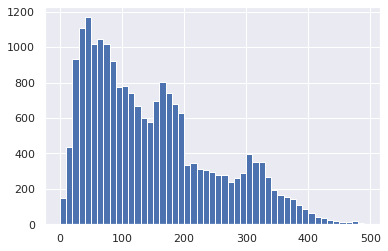

In [13]:
df1.dropna()['AQI'].hist(bins=range(0,500,10))

In [14]:
df1.isnull().sum()

Unnamed: 0       0
Date             0
Location         0
AQI           5253
Category        14
dtype: int64

In [15]:
df1.dropna(subset=['AQI'], inplace=True)
df1.isnull().sum()

Unnamed: 0    0
Date          0
Location      0
AQI           0
Category      1
dtype: int64

In [16]:
df1['Date'] = pd.to_datetime(df1['Date'], errors = 'coerce', )
df1

,Unnamed: 0,Date,Location,AQI,Category
0,0,2014-02-17,barishal,118.0,Unhealthy for Sensitive Groups
1,1,2014-02-17,dhaka,172.0,unhealthy
2,2,2014-02-17,chittagong,125.0,Unhealthy for Sensitive Groups
3,3,2014-02-17,gazipur,178.0,unhealthy
4,4,2014-02-17,narayanganj,174.0,unhealthy
...,...,...,...,...,...
26197,26197,2022-06-08,gazipur,136.0,Unhealthy for Sensitive Groups
26198,26198,2022-06-08,chittagong,61.0,moderate
26199,26199,2022-06-08,dhaka,161.0,unhealthy
26200,26200,2022-06-08,barishal,74.0,moderate


<AxesSubplot:>

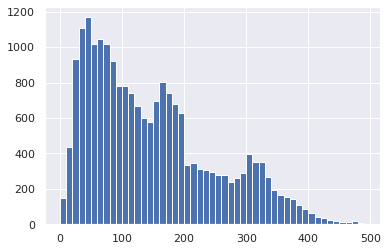

In [17]:
df1['AQI'].hist(bins=range(0,500,10))

In [18]:
def time_resample(dataframe, time_period):
    '''
    Resamples the dataframe over the given period of time. 
    For example, if values averaged over a day required then arguments would be df and "D"
    
    >> time_period: 'D' = days, 'M' = month, 'Y' = year

    Returns dataframe object
    '''
    dataframe.index = dataframe.Date
    #dataframe = dataframe.groupby(by='Location')
    resampled_df = pd.DataFrame()
    resampled_df['AQImean'] = dataframe.AQI.resample(time_period).mean()
    resampled_df['AQImed'] = dataframe.AQI.resample(time_period).median()
    resampled_df['AQImin'] = dataframe.AQI.resample(time_period).min()
    resampled_df['AQImax'] = dataframe.AQI.resample(time_period).max()
    resampled_df['AQIstd'] = dataframe.AQI.resample(time_period).std()
    resampled_df['Date'] = dataframe.Date.resample(time_period).first()
    #resampled_df['Location'] = dataframe.Date.resample(time_period).apply(lambda x: location)
    resampled_df['Measurements'] = dataframe.AQI.resample(time_period).count()
    resampled_df = resampled_df[resampled_df['Measurements']>resampled_df['Measurements'].max()/4]
    #output_df = pd.concat([output_df, resampled_df])
    #  To ensure statistical significance want to omit values when a significant fraction of the
    #  expected number of measurements in the given time period are missing. 
    #  For example, days when only 5 hours in 24 have measurement data available.
    return resampled_df

In [19]:
df_monthavg = time_resample(df1, 'M')
df_monthavg

,AQImean,AQImed,AQImin,AQImax,AQIstd,Date,Measurements
Date,,,,,,,
2014-03-31,207.664835,190.0,78.0,548.0,68.201706,2014-03-01,182
2014-04-30,161.638889,156.0,43.0,323.0,58.063514,2014-04-01,180
2014-05-31,97.873786,96.5,18.0,239.0,37.239942,2014-05-01,206
2014-06-30,87.741117,90.0,25.0,179.0,28.555334,2014-06-01,197
2014-07-31,55.867816,53.0,10.0,122.0,24.563938,2014-07-01,174
...,...,...,...,...,...,...,...
2022-01-31,250.935345,240.0,53.0,471.0,81.336137,2022-01-01,232
2022-02-28,215.740566,198.0,61.0,441.0,69.611744,2022-02-01,212
2022-03-31,227.250000,212.5,69.0,381.0,74.342307,2022-03-01,228


In [36]:
pre_covid = df1[df1['Date'].between('2014-02-17', '2020-03-08')]

In [20]:
before_covid = df1[df1['Date'].between('2019-01-01' , '2020-03-08')]

In [21]:
during_lockdown = df1[df1['Date'].between('2020-03-09' , '2021-08-08')]
during_lockdown


,Unnamed: 0,Date,Location,AQI,Category
Date,,,,,
2020-03-09,18649,2020-03-09,narayanganj,259.0,very unhealthy
2020-03-09,18651,2020-03-09,chittagong,70.0,moderate
2020-03-09,18652,2020-03-09,barishal,181.0,unhealthy
2020-03-09,18653,2020-03-09,rajshahi,145.0,Unhealthy for Sensitive Groups
2020-03-09,18654,2020-03-09,gazipur,180.0,unhealthy
...,...,...,...,...,...
2021-06-05,24034,2021-06-05,narayanganj,148.0,Unhealthy for Sensitive Groups
2021-06-05,24035,2021-06-05,rajshahi,82.0,moderate
2021-06-05,24039,2021-06-05,narsingdi,60.0,moderate


In [22]:
after_lockdown = df1[df1['Date'].between('2021-08-09' , '2022-06-08')]
after_lockdown


,Unnamed: 0,Date,Location,AQI,Category
Date,,,,,
2021-09-26,24044,2021-09-26,mymensingh,155.0,unhealthy
2021-09-26,24045,2021-09-26,rangpur,187.0,unhealthy
2021-09-26,24046,2021-09-26,khulna,22.0,good
2021-09-26,24047,2021-09-26,cumilla,62.0,moderate
2021-09-26,24048,2021-09-26,dhaka,172.0,unhealthy
...,...,...,...,...,...
2022-06-08,26197,2022-06-08,gazipur,136.0,Unhealthy for Sensitive Groups
2022-06-08,26198,2022-06-08,chittagong,61.0,moderate
2022-06-08,26199,2022-06-08,dhaka,161.0,unhealthy


In [23]:
yearavg = time_resample(df1, 'Y')
yearavg

,AQImean,AQImed,AQImin,AQImax,AQIstd,Date,Measurements
Date,,,,,,,
2014-12-31,148.116910,122.0,3.0,638.0,99.589321,2014-02-17,1916
2015-12-31,142.811472,116.0,0.0,542.0,103.737019,2015-01-01,2371
2016-12-31,133.867780,92.0,8.0,581.0,106.766508,2016-01-01,2216
2017-12-31,134.686219,106.0,5.0,821.0,101.406020,2017-01-01,2489
2018-12-31,147.054636,121.0,7.0,640.0,109.784568,2018-01-01,2599
2019-12-31,137.734294,115.0,8.0,636.0,97.840898,2019-01-01,3263
2020-12-31,138.881565,118.0,6.0,417.0,100.766925,2020-01-01,2913
2021-12-31,201.394028,184.0,19.0,488.0,96.550175,2021-01-01,2043
2022-12-31,178.900790,167.0,21.0,471.0,90.275558,2022-01-01,1139


(0.0, 400.0)

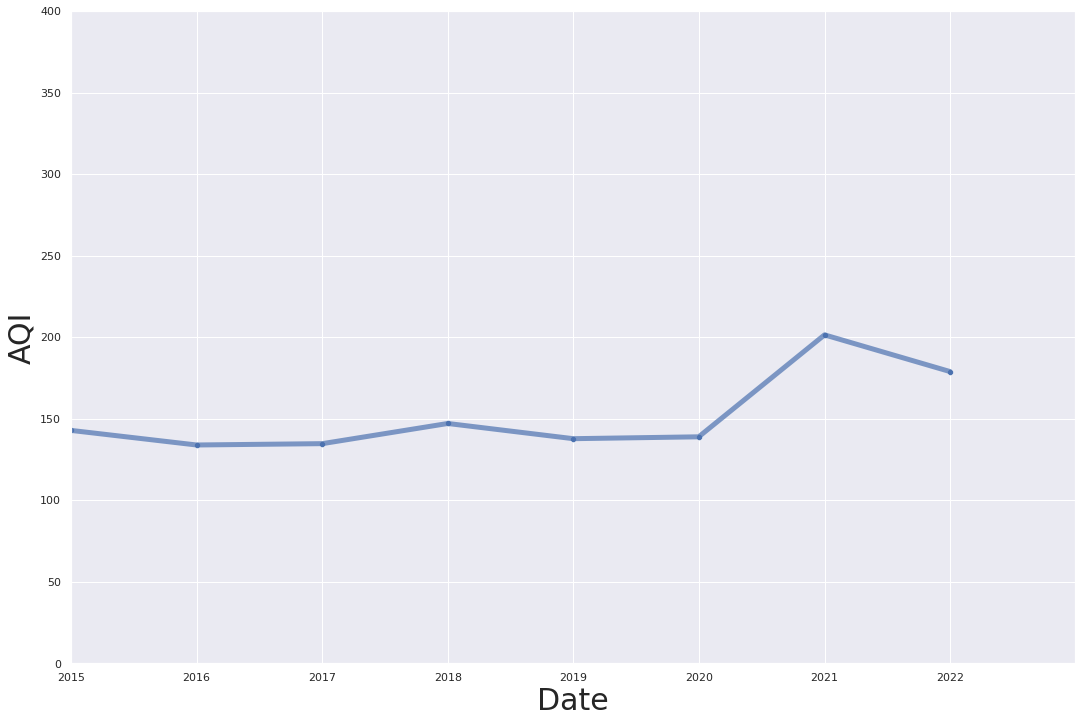

In [24]:
fig = plt.figure(figsize=(18,12))
sns.lineplot(data=yearavg, x='Date', y='AQImean', palette='deep', lw=5, alpha=0.7)
sns.scatterplot(data=yearavg, x='Date', y='AQImean', palette='deep', legend=True)
plt.xlim(datetime.strptime('2014-12-31', "%Y-%m-%d"), datetime.strptime('2022-12-31', "%Y-%m-%d"))
plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,400)

In [25]:
before_covid_monthavg = time_resample(before_covid, 'M')
before_covid_monthavg

,AQImean,AQImed,AQImin,AQImax,AQIstd,Date,Measurements
Date,,,,,,,
2019-01-31,274.081712,286.0,56.0,532.0,92.560776,2019-01-01,257
2019-02-28,233.307359,217.0,30.0,636.0,95.466843,2019-02-01,231
2019-03-31,185.108225,175.0,45.0,479.0,71.277239,2019-03-01,231
2019-04-30,118.561404,113.5,28.0,310.0,55.992138,2019-04-01,228
2019-05-31,94.991071,93.5,10.0,227.0,41.483152,2019-05-01,224
2019-06-30,63.550173,54.0,14.0,209.0,34.884209,2019-06-01,289
2019-07-31,52.857585,44.0,8.0,185.0,34.057197,2019-07-01,323
2019-08-31,51.603774,46.0,8.0,132.0,28.951069,2019-08-01,265
2019-09-30,61.940972,57.5,14.0,163.0,33.364735,2019-09-01,288


In [26]:
during_lockdown_monthavg = time_resample(during_lockdown, 'M')
during_lockdown_monthavg

,AQImean,AQImed,AQImin,AQImax,AQIstd,Date,Measurements
Date,,,,,,,
2020-03-31,183.887850,178.0,70.0,316.0,56.116511,2020-03-09,107
2020-04-30,90.346667,82.0,20.0,227.0,44.325215,2020-04-01,150
2020-05-31,60.541935,49.0,20.0,139.0,31.332577,2020-05-01,155
2020-06-30,53.934132,45.0,16.0,154.0,30.001032,2020-06-01,167
2020-07-31,53.752577,46.0,14.0,138.0,26.208819,2020-07-01,194
2020-08-31,42.202166,34.0,6.0,128.0,27.964696,2020-08-01,277
2020-09-30,54.613281,46.0,10.0,189.0,35.121119,2020-09-01,256
2020-10-31,92.894410,91.0,12.0,220.0,49.228642,2020-10-01,322
2020-11-30,159.353357,156.0,10.0,362.0,73.203851,2020-11-01,283


In [27]:
after_lockdown_monthavg = time_resample(after_lockdown, 'M')
after_lockdown_monthavg

,AQImean,AQImed,AQImin,AQImax,AQIstd,Date,Measurements
Date,,,,,,,
2021-10-31,118.168950,118.0,19.0,243.0,53.924631,2021-10-01,219
2021-11-30,186.334884,170.0,39.0,388.0,76.766605,2021-11-01,215
2021-12-31,226.195122,219.0,34.0,421.0,99.060951,2021-12-01,246
2022-01-31,250.935345,240.0,53.0,471.0,81.336137,2022-01-01,232
2022-02-28,215.740566,198.0,61.0,441.0,69.611744,2022-02-01,212
2022-03-31,227.250000,212.5,69.0,381.0,74.342307,2022-03-01,228
2022-04-30,108.137168,111.0,35.0,206.0,36.202563,2022-04-02,226
2022-05-31,98.544041,93.0,21.0,223.0,44.370239,2022-05-04,193


In [40]:
pre_covid_mean = time_resample(pre_covid, 'M')
pre_covid_mean

,AQImean,AQImed,AQImin,AQImax,AQIstd,Date,Measurements
Date,,,,,,,
2014-03-31,207.664835,190.0,78.0,548.0,68.201706,2014-03-01,182
2014-04-30,161.638889,156.0,43.0,323.0,58.063514,2014-04-01,180
2014-05-31,97.873786,96.5,18.0,239.0,37.239942,2014-05-01,206
2014-06-30,87.741117,90.0,25.0,179.0,28.555334,2014-06-01,197
2014-07-31,55.867816,53.0,10.0,122.0,24.563938,2014-07-01,174
...,...,...,...,...,...,...,...
2019-10-31,111.248120,110.0,15.0,259.0,53.486716,2019-10-01,266
2019-11-30,183.150470,186.0,13.0,382.0,76.996871,2019-11-01,319
2019-12-31,231.152047,225.0,74.0,466.0,66.300128,2019-12-01,342


(0.0, 400.0)

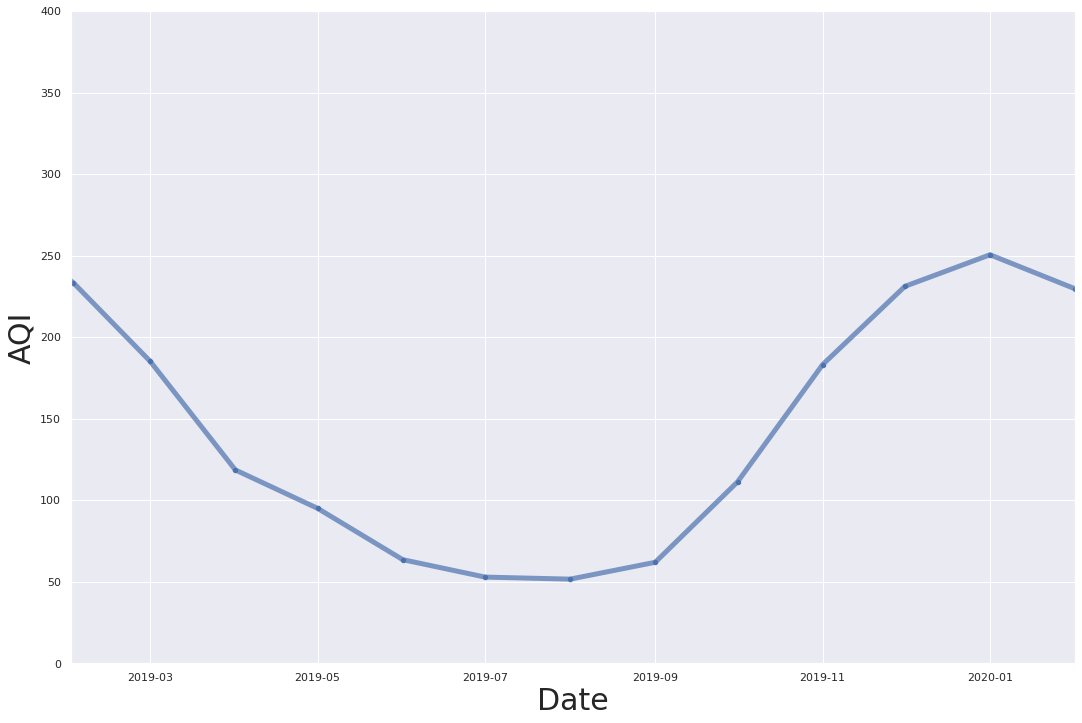

In [28]:
fig = plt.figure(figsize=(18,12))
sns.lineplot(data=before_covid_monthavg, x='Date', y='AQImean', palette='deep', lw=5, alpha=0.7)
sns.scatterplot(data=before_covid_monthavg, x='Date', y='AQImean', palette='deep', legend=False)
plt.xlim(datetime.strptime('2019-01-31', "%Y-%m-%d"), datetime.strptime('2020-02-01', "%Y-%m-%d"))
plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,400)

(0.0, 400.0)

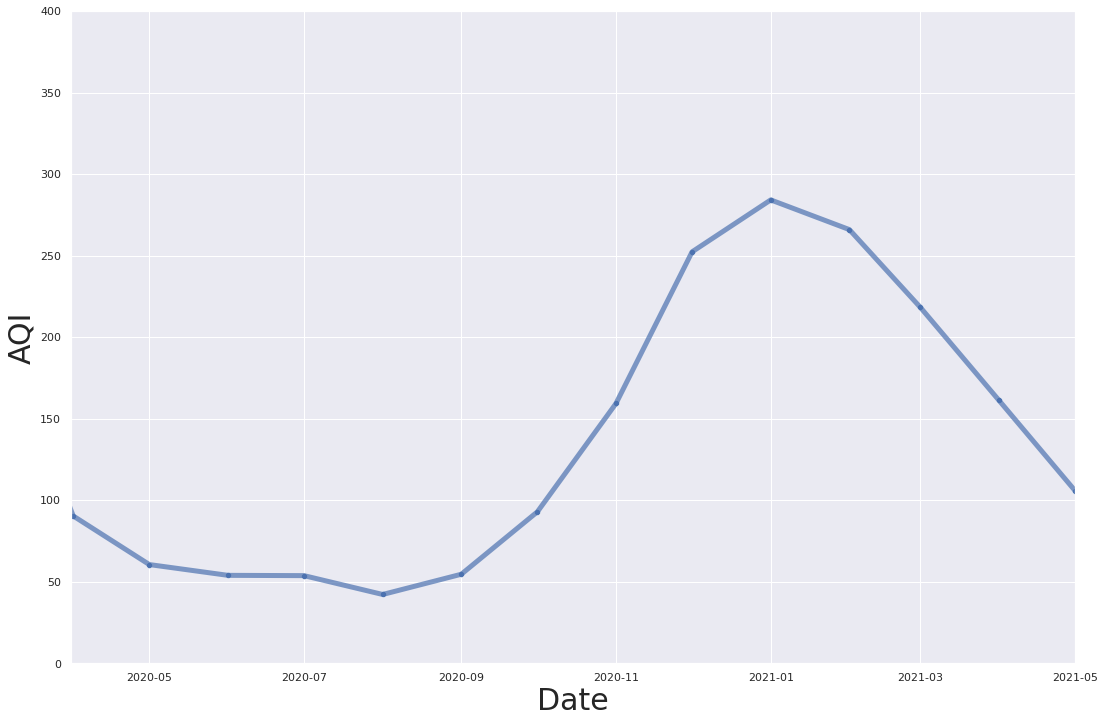

In [29]:
fig = plt.figure(figsize=(18,12))
sns.lineplot(data=during_lockdown_monthavg, x='Date', y='AQImean', palette='deep', lw=5, alpha=0.7)
sns.scatterplot(data=during_lockdown_monthavg, x='Date', y='AQImean', palette='deep', legend=False)
plt.xlim(datetime.strptime('2020-03-31', "%Y-%m-%d"), datetime.strptime('2021-05-01', "%Y-%m-%d"))
plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,400)

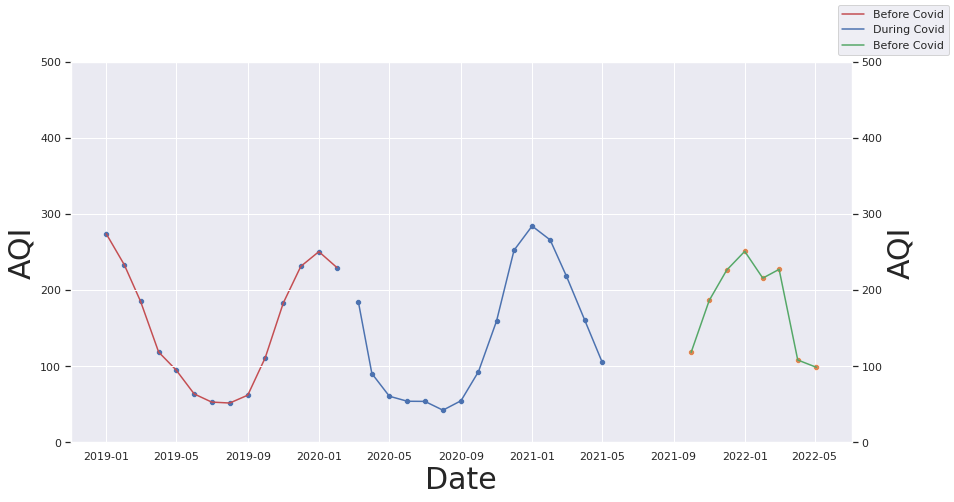

In [30]:
# Line Chart For Agricultural Land Cover
fig, ax = plt.subplots(figsize=(14,7))
lineplot = sns.lineplot(x='Date', y='AQImean', data=before_covid_monthavg, 
                        label = 'Before Covid', color="r",  legend=False)
scatterplot = sns.scatterplot(data=before_covid_monthavg, x='Date', y='AQImean', palette='deep', legend=False)

#plt.xlim(datetime.strptime('2019-01-31', "%Y-%m-%d"), datetime.strptime('2020-02-01', "%Y-%m-%d"))
plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,500)

# Line Chart For Forest Cover
ax2 = ax.twinx()
lineplot2 = sns.lineplot(x='Date', y='AQImean', data = during_lockdown_monthavg, ax=ax2, color="b", 
                         label ='During Covid', legend=False) 
scatterplot2 = sns.scatterplot(data=during_lockdown_monthavg, x='Date', y='AQImean', palette='deep', legend=False)

plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,500)
lineplot3 = sns.lineplot(x='Date', y='AQImean', data=after_lockdown_monthavg, 
                        label = 'Before Covid', color="g",  legend=False)
#plt.xlim(datetime.strptime('2019-01-31', "%Y-%m-%d"), datetime.strptime('2020-02-01', "%Y-%m-%d"))
scatterplot3 = sns.scatterplot(data=after_lockdown_monthavg, x='Date', y='AQImean', palette='deep', legend=False)

plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,500)
ax.figure.legend();

In [31]:
before_covid_monthavg

,AQImean,AQImed,AQImin,AQImax,AQIstd,Date,Measurements
Date,,,,,,,
2019-01-31,274.081712,286.0,56.0,532.0,92.560776,2019-01-01,257
2019-02-28,233.307359,217.0,30.0,636.0,95.466843,2019-02-01,231
2019-03-31,185.108225,175.0,45.0,479.0,71.277239,2019-03-01,231
2019-04-30,118.561404,113.5,28.0,310.0,55.992138,2019-04-01,228
2019-05-31,94.991071,93.5,10.0,227.0,41.483152,2019-05-01,224
2019-06-30,63.550173,54.0,14.0,209.0,34.884209,2019-06-01,289
2019-07-31,52.857585,44.0,8.0,185.0,34.057197,2019-07-01,323
2019-08-31,51.603774,46.0,8.0,132.0,28.951069,2019-08-01,265
2019-09-30,61.940972,57.5,14.0,163.0,33.364735,2019-09-01,288


In [32]:
during_lockdown_monthavg

,AQImean,AQImed,AQImin,AQImax,AQIstd,Date,Measurements
Date,,,,,,,
2020-03-31,183.887850,178.0,70.0,316.0,56.116511,2020-03-09,107
2020-04-30,90.346667,82.0,20.0,227.0,44.325215,2020-04-01,150
2020-05-31,60.541935,49.0,20.0,139.0,31.332577,2020-05-01,155
2020-06-30,53.934132,45.0,16.0,154.0,30.001032,2020-06-01,167
2020-07-31,53.752577,46.0,14.0,138.0,26.208819,2020-07-01,194
2020-08-31,42.202166,34.0,6.0,128.0,27.964696,2020-08-01,277
2020-09-30,54.613281,46.0,10.0,189.0,35.121119,2020-09-01,256
2020-10-31,92.894410,91.0,12.0,220.0,49.228642,2020-10-01,322
2020-11-30,159.353357,156.0,10.0,362.0,73.203851,2020-11-01,283


In [33]:
after_lockdown_monthavg

,AQImean,AQImed,AQImin,AQImax,AQIstd,Date,Measurements
Date,,,,,,,
2021-10-31,118.168950,118.0,19.0,243.0,53.924631,2021-10-01,219
2021-11-30,186.334884,170.0,39.0,388.0,76.766605,2021-11-01,215
2021-12-31,226.195122,219.0,34.0,421.0,99.060951,2021-12-01,246
2022-01-31,250.935345,240.0,53.0,471.0,81.336137,2022-01-01,232
2022-02-28,215.740566,198.0,61.0,441.0,69.611744,2022-02-01,212
2022-03-31,227.250000,212.5,69.0,381.0,74.342307,2022-03-01,228
2022-04-30,108.137168,111.0,35.0,206.0,36.202563,2022-04-02,226
2022-05-31,98.544041,93.0,21.0,223.0,44.370239,2022-05-04,193


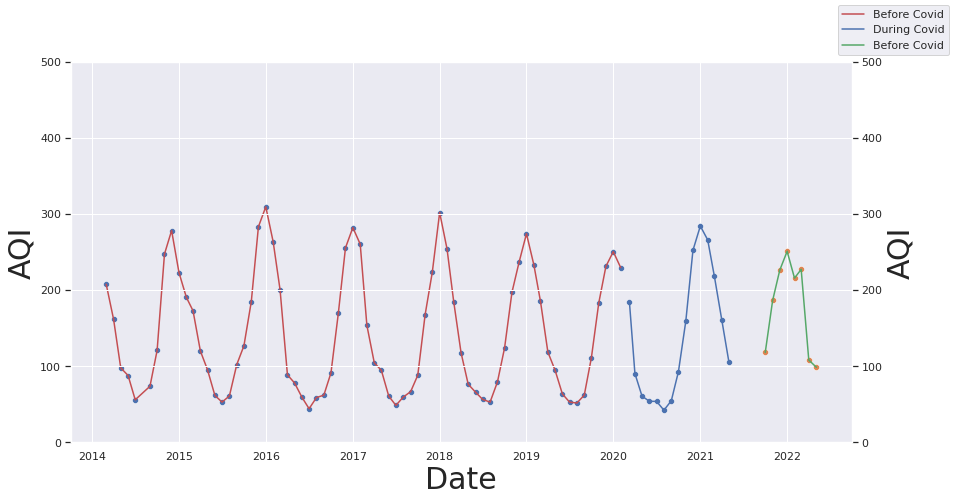

In [43]:
# Line Chart For Agricultural Land Cover
fig, ax = plt.subplots(figsize=(14,7))


lineplot = sns.lineplot(x='Date', y='AQImean', data=pre_covid_mean, 
                        label = 'Before Covid', color="r",  legend=False)
scatterplot = sns.scatterplot(data=pre_covid_mean, x='Date', y='AQImean', palette='deep', legend=False)

#plt.xlim(datetime.strptime('2019-01-31', "%Y-%m-%d"), datetime.strptime('2020-02-01', "%Y-%m-%d"))
plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,500)

# Line Chart For Forest Cover
ax2 = ax.twinx()
lineplot2 = sns.lineplot(x='Date', y='AQImean', data = during_lockdown_monthavg, ax=ax2, color="b", 
                         label ='During Covid', legend=False) 
scatterplot2 = sns.scatterplot(data=during_lockdown_monthavg, x='Date', y='AQImean', palette='deep', legend=False)

plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,500)
lineplot3 = sns.lineplot(x='Date', y='AQImean', data=after_lockdown_monthavg, 
                        label = 'Before Covid', color="g",  legend=False)
#plt.xlim(datetime.strptime('2019-01-31', "%Y-%m-%d"), datetime.strptime('2020-02-01', "%Y-%m-%d"))
scatterplot3 = sns.scatterplot(data=after_lockdown_monthavg, x='Date', y='AQImean', palette='deep', legend=False)

plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,500)
ax.figure.legend();

(0.0, 500.0)

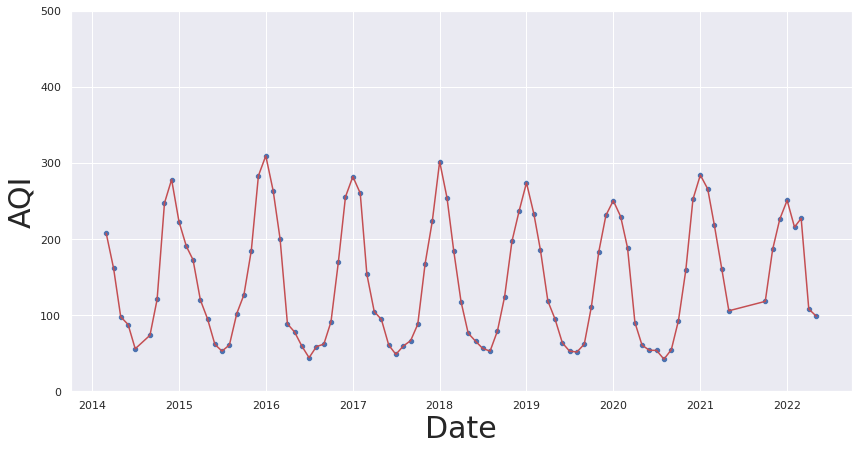

In [35]:
fig, ax = plt.subplots(figsize=(14,7))
lineplot = sns.lineplot(x='Date', y='AQImean', data=df_monthavg, 
                        label = 'Before Covid', color="r",  legend=False)
scatterplot = sns.scatterplot(data=df_monthavg, x='Date', y='AQImean', palette='deep', legend=False)

#plt.xlim(datetime.strptime('2019-01-31', "%Y-%m-%d"), datetime.strptime('2020-02-01', "%Y-%m-%d"))
plt.ylabel('AQI', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.ylim(0,500)
